In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [3]:
import pdb
from scipy import integrate
from scipy import special
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from patch_geo_func import x_ep, y_ep
from sys import stdout
import warnings
np.seterr(invalid = 'raise', under = 'ignore', over = 'ignore')
from LGN_surface import *
from repel_system import *

In [4]:
posL_file = 'parvo_pos_I5_cart.bin'
posR_file = 'parvo_pos_C6_cart.bin'
shape_file = 'LGN_shape.bin'
ecc = 2.5 #in deg

nx = 101
ny = 201

x = np.linspace(0, ecc, nx)
dx = x[1]-x[0]
x = np.linspace(-dx, ecc+dx, nx)

y = np.linspace(-ecc, ecc, ny)
dy = y[1]-y[0]
y = np.linspace(-ecc-dy, ecc+dy, ny)

xx, yy = np.meshgrid(x,y)
Pi = np.sqrt(xx*xx + yy*yy) - ecc < 0
Pi[xx<0] = 0
print(Pi.shape)
with open(shape_file, 'wb') as f:
    np.array([nx, ny], dtype = 'u4').tofile(f)
    x.tofile(f)
    y.tofile(f)
    Pi.astype('i4').tofile(f)
print([np.min(x), np.max(x)])
print([np.min(y), np.max(y)])

(201, 101)
[-0.025, 2.525]
[-2.525, 2.525]


In [6]:
pos_file = 'temp_pos.bin'
LGN_surfaceL = surface(shape_file, pos_file, 2.525)
LGN_surfaceL.prep_pos()

get the index of the nearest vertex for each neuron in its own grid
calculate neurons' cortical distance to the nearest vertex in the grid
#boundary points: 527 
adjust 527 positions near the boundary
[ 0.23233804 -0.13969311]
[0.00631663 0.26844743]
get the index of the nearest vertex for each neuron in its own grid
calculate neurons' cortical distance to the nearest vertex in the grid
after pos adjustment: 


grid area: 9.873823125000083, used in simulation
defining the boundary midway through the grid
0.17307472229003906
characteristic length (inter-particle-distance)
particle:
a = 0.02618390188780964
b = 0.02618390188780964
k1 = 2
k2 = 1
cl = 0.02618390188780964
boundary:
a = 0.010473560755123856
b = 0.010473560755123856
k1 = 2
k2 = 1
cl = 0.010473560755123856
596 boundary points and 25984 particles initialized
in units of grids (0.025,0.025):
    interparticle distance (0.411,0.415)
    radius of influence for particles (2.054,2.074)
    radius of influence for boundaries (0.821,0.830)
    default limiting of displacement in one dt: (0.411, 0.415)
initialized
100.000%, 0 particles' displacement are limited, 0 particles freezedd

get the index of the nearest vertex for each neuron in its own grid
calculate neurons' cortical distance to the nearest vertex in the grid


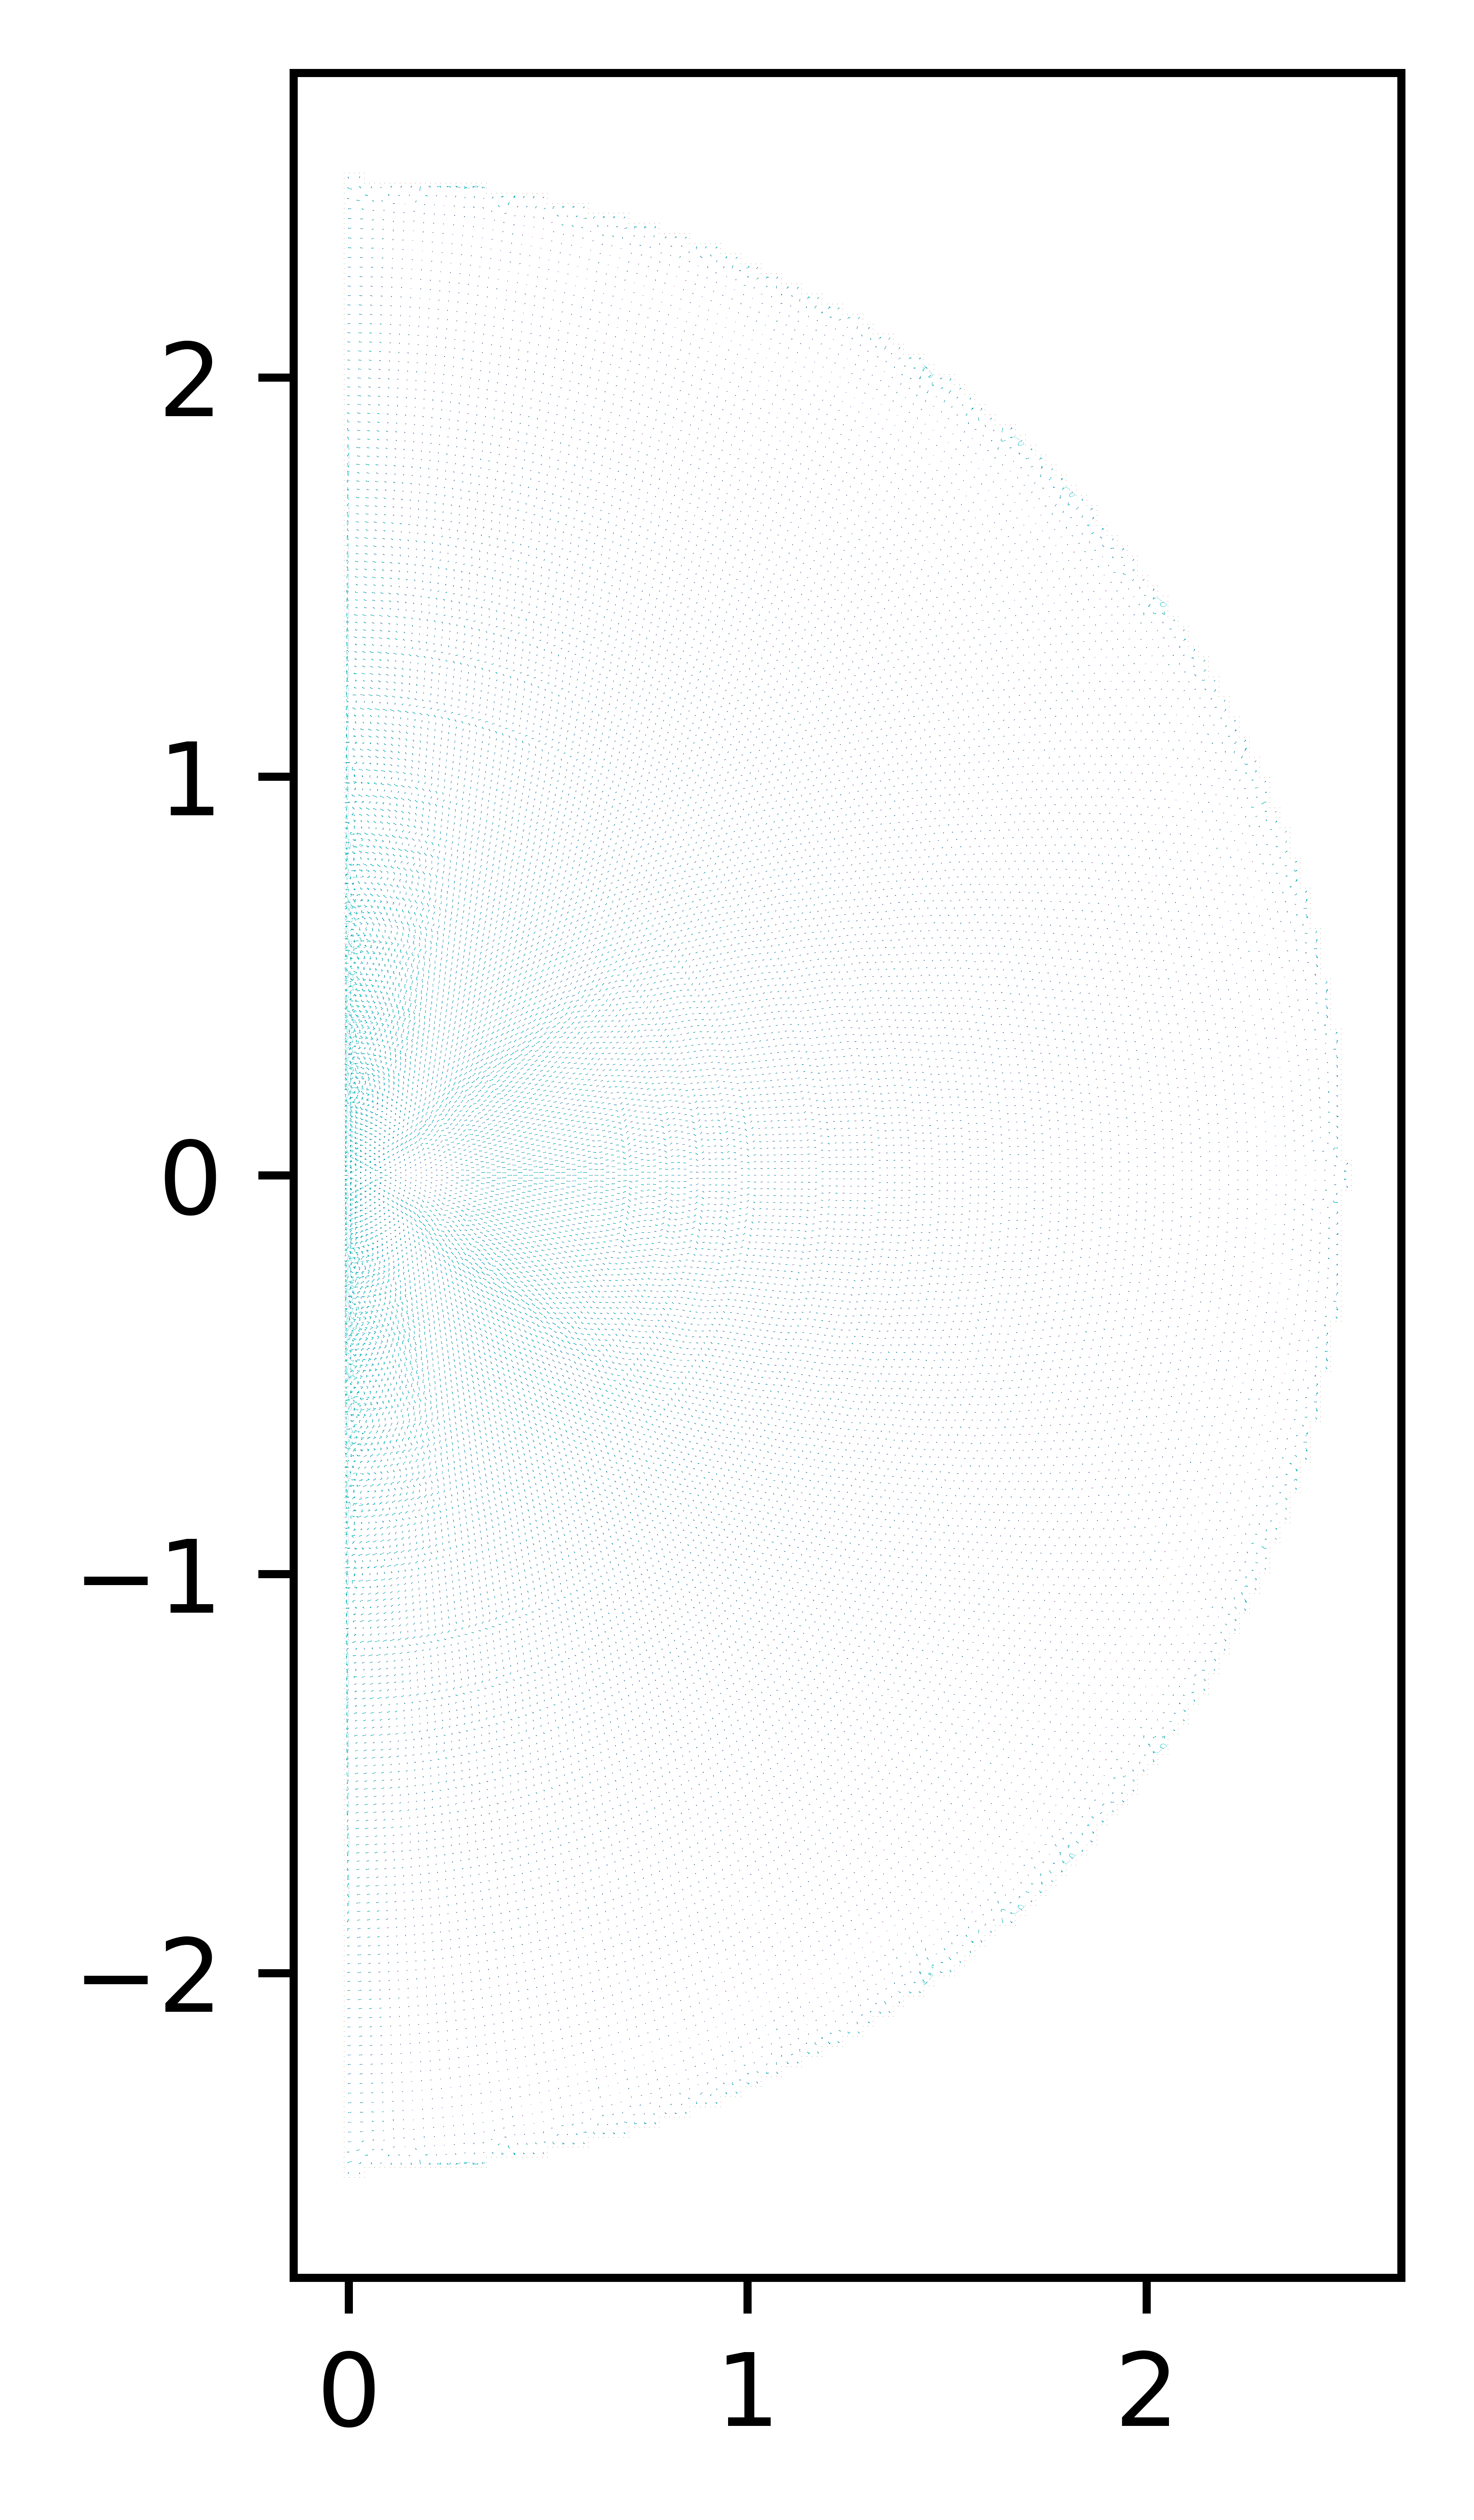

In [7]:
fig = plt.figure('vf_pos', dpi = 900)
ax = fig.add_subplot(111)
dt0 = np.power(2.0,-np.arange(7,8)).reshape(1,1)
dt1 = np.power(2.0,-np.arange(7,8)).reshape(1,1)
dt = np.hstack((np.tile(dt0,(25,1)).flatten(), np.tile(dt1,(5,1)).flatten()))
LGN_surfaceL.make_pos_uniform(dt, ax = ax, b_scale = 1.0, p_scale = 2.5)

In [1]:
LGN_surfaceL.save_pos('temp_pos.bin')

NameError: name 'LGN_surfaceL' is not defined